<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 2 - Algorismes sobre grafs</h2>
</center>
</div>

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import matplotlib.pylab as plt
import numpy as np
import random

## Recordatori: DFS

In [5]:
def dfs(G, visited, current_node):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim
    if current_node not in visited:        
        print(current_node, end=' ')
        visited.add(current_node)

        # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
        for nei in G.neighbors(current_node):
            dfs(G, visited, nei)        

DFS: 0 1 2 3 4 5 6 7 8 9 

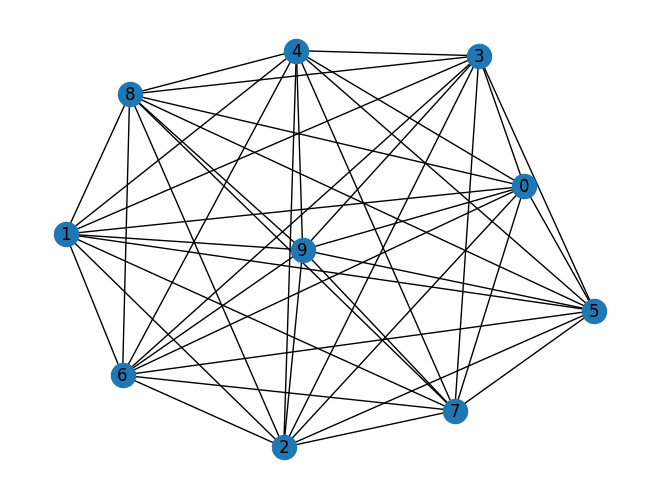

In [6]:
import networkx as nx
G = nx.random_geometric_graph(10, 3)

print('DFS: ',end='')
dfs(G, set(), 0)

nx.draw(G, with_labels=True)

## Component connexa

Sigui $G$ un graf, una __component connexa__ és un subgraf $S\subset G$ tal que, per a dos nodes qualsevols de $S$, existeix un camí dins de $S$ que els connecta i per a qualsevol parella de nodes de $G$ on $n_1\in S$, $n_2\notin S$, no existeix un camí entre $n_1$ i $n_2$.

Observeu l'exemple següent. Aquest graf té tres compoenents connexes:

<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg" alt="image info" style="width:20%"/>

<div class="alert alert-success">
<h1>Problema 1</h1>
<p>
    Donat un graf, escriu un algorisme que retorni el nombre de components connexes que conté i una llista de llistes amb tots els nodes de cada component connexa.
</p>    
    
</div>

In [7]:
# Implementació del DFS. Funció auxiliar per a resoldre el problema de les components connexes.
# En aquest cas, passarem una llista extra 'visited_nodes_cc' que conté els nodes visitats dins de la component actual
# En canvi, 'visited' contindrà tots els nodes visitats fins el moment (és a dir, de totes les components connexes)
def dfs_aux(G, visited, current_node, visited_nodes_cc):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim
    if current_node not in visited:        
        visited.add(current_node)
        visited_nodes_cc.append(current_node)

        # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
        for nei in G.neighbors(current_node):
            dfs_aux(G, visited, nei, visited_nodes_cc)


def connected_components(G):
    # Per practicar amb llistes i conjunts, podem definir 'visited' com a conjunt (set()) i 
    # la llista de components connexes com a llista ([]).
    visited = set() # Conté tots els nodes visitats fins al moment
    components = [] # Contindrà les components connexes (llista de llistes)
    for n in G.nodes():
        if n not in visited:
            visited_nodes_cc = [] # Inicialitzem la component connexa i visitem tots els seus nodes
            dfs_aux(G, visited, n, visited_nodes_cc)
            components.append(visited_nodes_cc)

    return len(components), components

(3, [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12, 13, 14]])


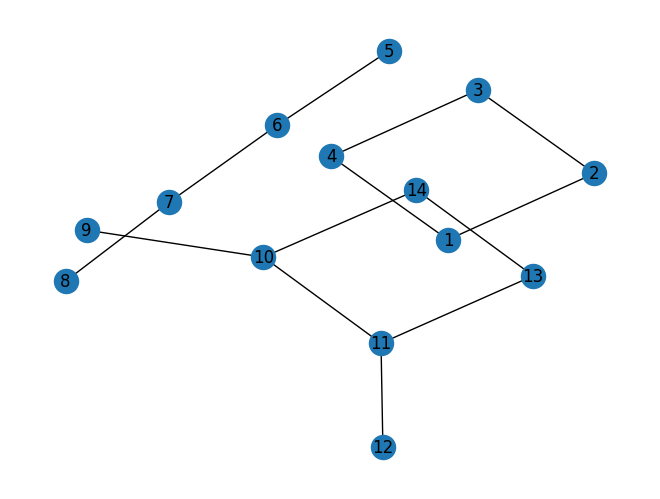

In [8]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,1),(5,6),(6,7),(7,8),(9,10),(10,11),(11,12),(11,13),(13,14),(14,10)])
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True)

print(connected_components(G))

## Grafs bipartits

Diem que un graf és __bipartit__ si podem separar els seus nodes en dos grups de manera que els nodes del primer grup només tinguin arestes cap a nodes del segon grup (i viceversa). És a dir, que no existeixin arestes que connectin nodes d'un mateix grup: 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/Simple-bipartite-graph.svg" alt="bipartite graph" style="width: 25%" />

Networkx ens permet generar grafs bipartits aleatoris utilitzant la funció `random_graph()` del mòdul _bipartite_. Aquesta funció rep tres paràmetres $n, m, p$ on:
- $n$ és el nombre de nodes del primer grup.
- $m$ és el nombre de nodes del segon grup.
- $p$ és la probabilitat de creació d'arestes (0 per no crear-ne cap i 1 per crear-les totes).

La visualització següent mostra el mateix graf usant dos _layouts_ diferents. La primera figura mostra el layout per defecte on no és fàcil veure si el graf és bipartit o no. En el segon, podem veure clarament els dos grups i com les arestes no connecten nodes d'un mateix grup.

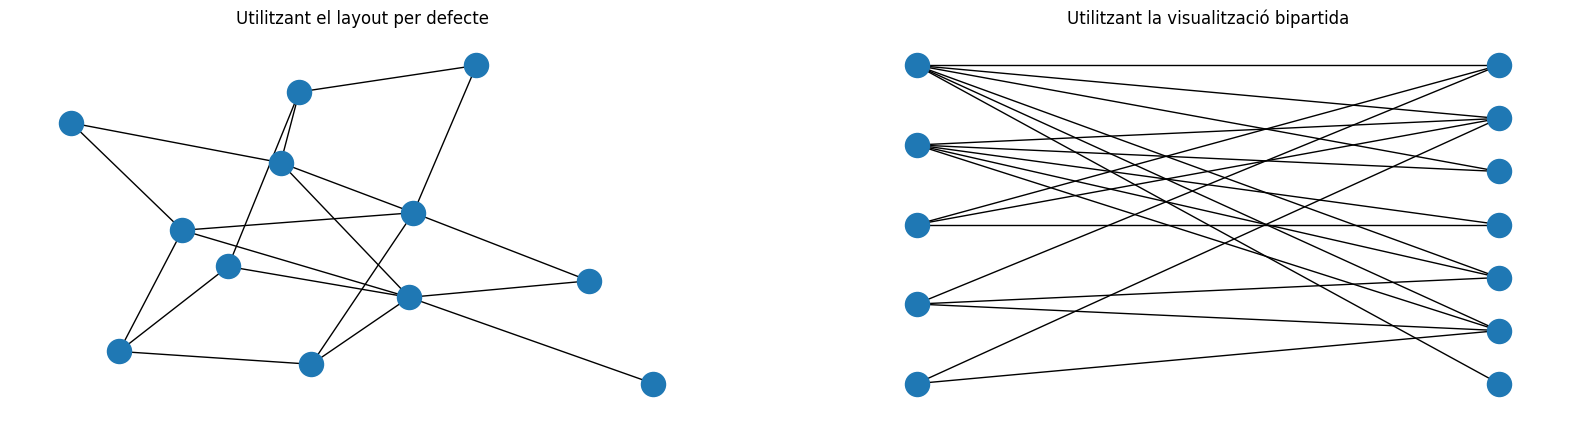

In [9]:
# Generem un graf bipartit connectat (tots els nodes tenen com a mínim una aresta associada)
G = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G = nx.algorithms.bipartite.random_graph(5,7,0.6)

top = nx.bipartite.sets(G)[0]
posbi = nx.bipartite_layout(G, top)

# Mostrem el mateix graf de dues formes diferents
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title('Utilitzant el layout per defecte')
nx.draw(G, ax=axs[0])

axs[1].set_title('Utilitzant la visualització bipartida')
nx.draw(G, pos=posbi, ax=axs[1])

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Implementeu un algorisme per a determinar si un graf és bipartit. Assumirem que el graf està connectat (entre dos nodes qualsevols sempre existeix un camí) i és NO dirigit.
    <ul>
        <li>Podeu utilitzar el diccionari intern de cada node per a guardar-hi informació: <br>$G.nodes[idx][clau]$ on $idx$ és l'index del node i $clau$ és qualsevol paraula que identifica l'atribut del node.
        <li>Podeu usar la funcio 'neighbors' per a retornar els veïns d'un node
        <li>Per a que sigui més senzill, definiu una funció auxiliar que es basi en el DFS per a fer la cerca.
    </ul>
</p>    
    
<p>

</p>
    
</div>

In [10]:
# Generem un graf bipartit
# En aquest problema, ens assegurem que el graf generat no tingui nodes aïllats
G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)

# Al crear un graf bipartit, es crea un atribut anomenat 'bipartite' que pren valors 0 i 1. Els eliminem ja que no els usarem en la nostra solució
for n in G_bi.nodes():
    del G_bi.nodes[n]['bipartite']

In [11]:
# Generem un graf NO bipartit
G_geo = nx.random_geometric_graph(10, 3)

<div class="alert alert-warning">
Un graf és bipartit si, com hem vist a la introducció, el podem pintar de dos colors. És a dir, si estem utilitzant BLAU i VERMELL, sempre que pintem un node de color BLAU, hem de comprovar que tots els seus veïns són VERMELLS, i viceversa.
</div>

In [12]:
# VERSIÓ 1 (No òptima)
# Pas 1: Pintem tots els nodes del graf mentre aquests no estiguin visitats
# Pas 2: Comprovem que se satisfà la condició de bipartit, és a dir, que tots els veïns d'un node estan pintat d'un color diferent.

# Per fer-ho usarem, en comptes de colors, un atribut del node al que hem anomenat 'grup' i que pot prendre valor -1 i 1.

# Funció DFS auxiliar, molt similar a la del primer exercici. Passem com a paràmetre el grup que toca assignar al node
def dfs_paint(G, n, grup):
    
    # Si no ten un grup assignat, li assignem
    if 'grup' not in G.nodes[n]:
        G.nodes[n]['grup']=grup    
        
        # Visitem tots els veïns d'un node, assignant el grup contrari: grup*(-1) per anar alternant -1 i 1
        for nei in G.neighbors(n):            
            dfs_paint(G, nei, grup*-1)

def es_bipartit(G):
    # Agafem un node qualsevol, en aquest cas estem triant el primer de la llista
    n = list(G_bi.nodes())[0]    
    
    # Apliquem DFS per assignar els grups, començant per assignar-li el grup 1 al primer node
    dfs_paint(G,n,1)
    
    # Comprovem si l'assignació satisfà la definició de bipartit.
    # Tots els veïns d'un node han de tenir un grup assignat diferent a el seu.
    for v in G.nodes():
        for nei in G.neighbors(v):
            if G.nodes[v]['grup']==G.nodes[nei]['grup']:                
                # Retornem False si dos veïns no satisfan la condició.
                return False
    
    # Retornem True si tots els veïns satisfan la condició.
    return True

In [13]:
# VERSIÓ 2
# Funció DFS auxiliar, molt similar a la del primer exercici. Passem com a paràmetre el grup que toca assignar al node.
# Farem el mateix que en la solució anterior amb una millora. Parem l'execució si trobem una contradicció.

def dfs_paint_v2(G, n, grup):
    
    # Comprovem si ja hem visitat el node actual n, igual que abans
    # Li assignem un grup en cas que no ho haguem fet encara
    if 'grup' not in G.nodes[n]:
        G.nodes[n]['grup']=grup          
        
        # Per cada veí del node, si ja està pintat, comprovem si son o no del mateix color. 
        # Si ho son, ja hem acabat i l'algorisme ha de retornar False
        for nei in G.neighbors(n):     
            if 'grup' in G.nodes[nei]: # Comprovem si el veí està visitat
                if G.nodes[nei]['grup']==G.nodes[n]['grup']: # Comprovem si són del mateix color
                    return False
                           
            # Si el veí no està visitat, l'explorem.
            # Observeu que al cridar aquesta funció estem comprovant si retornarà False. 
            # En cas que sigui així, hem d'acabar l'execució
            elif not dfs_paint_v2(G, nei, grup*-1): # És a dir 
                return False
                
    return True

def es_bipartit_v2(G):
    # Agafem un node qualsevol, en aquest cas estem triant el primer de la llista
    n = list(G.nodes())[-1]    
   
    # Apliquem DFS per assignar els grups, començant per assignar-li el grup 1 al primer node
    return dfs_paint_v2(G,n,1)

In [14]:
print(es_bipartit(G_bi.copy()))
print(es_bipartit(G_geo.copy()))

True
False


In [15]:
print(es_bipartit_v2(G_bi.copy()))
print(es_bipartit_v2(G_geo.copy()))

True
False


<div class="alert alert-warning">
Observeu el temps d'execució de les dues versions de l'algorisme del segon exercici. Podeu veure com una implementació és més ràpida que l'altre.
</div>

In [16]:
%%timeit -n 1000
es_bipartit(G_bi.copy())
es_bipartit(G_geo.copy())

128 μs ± 2.39 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
%%timeit -n 1000
es_bipartit_v2(G_bi.copy())
es_bipartit_v2(G_geo.copy())

109 μs ± 469 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<div class="alert alert-success">
<h1>Problema 3</h1>
<p>
    Donada una matriu binària (que només conté zeros i uns) i una casella inicial que conté un 1, implementeu una funció que retorni quants uns són visitables suposant que només ens podem moure cap amunt, cap avall o cap als dos costats.
    Només podem visitar les caselles que contenen uns.
</p>    
    
<p>

</p>
    
</div>

In [18]:
# Els nodes en aquest cas volem que siguin els indexos (x, y) de la matriu
def dfs_visit(M, visited, current_node):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim
    if current_node not in visited:   
        visited.add(current_node)

        # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
        x, y = current_node
        # Cada veí d'un node es:
        #           x-1, y
        #   x, y-1    x, y  x, y+1
        #           x+1, y
        for i, j in [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]:
            # Tenim que comprovar que l'index estigui dins de la matriu (entre 0 i len(M))
            # i també comprovem que el node es igual a 1
            if (0<=i<len(M)) and (0<=j<len(M[0])) and (M[i][j]==1):
                dfs_visit(M, visited, (i,j))        

def visitable_cells(M, init):
    x, y = init
    assert M[x][y] == 1
    
    visited = set()
    
    dfs_visit(M, visited, init)
    
    return len(visited), visited

In [19]:
M = [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]]
init = (1, 1)

for m in M:
    print(m)

num_visit, visit  = visitable_cells(M, init)
print(f"Des de la cel·la {init} es poden visitar {num_visit} cel·les:")
for v1, v2 in visit:
    M[v1][v2] = 8
    
for m in M:
    print(m)

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
Des de la cel·la (1, 1) es poden visitar 23 cel·les:
[0, 8, 8, 8, 0, 8, 0, 0, 0, 0]
[8, 8, 0, 8, 8, 8, 8, 8, 0, 0]
[0, 8, 8, 8, 8, 8, 8, 8, 8, 0]
[1, 0, 0, 8, 0, 8, 0, 0, 8, 8]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]


# Flood Fill

L'algorisme __Flood Fill__ (algorisme d'emplenat) és usat per múltiples editors d'imatges com ara __Paint__, __Gimp__ o __Photoshop__ en l'eina __Pot de Pintura (Paint bucket)__ o __Bareta màgica (Magic Wand)__. Aquesta eina, ens permet seleccionar un punt de la imatge (node inicial) del qual se n'agafa el color. A continuació, s'expandeix a tots els nodes veïns del mateix color fins a seleccionar la màxima àrea possible.



Considerant una imatge com un graf on els nodes veïns de cada pixel són els que toquen amb ell, podem aplicar l'algorisme DFS per a implementar el Flood Fill.

<div class="alert alert-success">
<h1>Problema 4</h1>
<p>
    Implementeu l'algorimse <b>Flood Fill</b>. Podeu usar altres imatges per a provar el vostre algorisme. Tingueu en compte que les imatges no poden ser gaire grans ja que se superarien el nombre de recursions que Jupyter permet.
</p>    
    
<p>
Els següents passos us poden servir de guia:
    <ol>
    <li> És un algorimse recursiu ja que cada hem d'anar expandint nodes (píxels) mentre que el color sigui el mateix. Comença definint la condició de parada.
    <li> Per a cada píxel, qui són els seus veïns? Tots els píxels tenen el mateix nombre de veïns?
    </ol>
</p>
<br>
<b>EXTRA</b>: Modifiqueu l'algorísme afegint un nou paràmetre de tolerància entre colors. Podeu fer servir la funció següent per a calcular la distància entre dos colors:
</div>

In [20]:
# ================
# EXTRA
import numpy as np
def color_distance(color1, color2):
    # Defineix la distància euclidiana entre dos vectors: 'color1', 'color2'
    return np.linalg.norm(color1-color2)
# ================

In [21]:
import sys
# Aquesta instrucció ens permet augmentar el límit de recursions permeses
sys.setrecursionlimit(int(1e9))

In [22]:
from PIL import Image

# Obrim una imatge
image = Image.open('img/map.png').convert('RGB')
width, height = image.size

# Podeu aplicar un factor de reescalat si la imatge és gran
resize_val = 0.5
image = image.resize((int(width*resize_val),int(height*resize_val)))

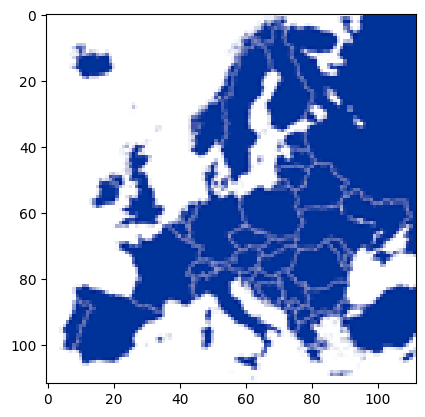

In [23]:
data = np.array(image)
plt.imshow(data)
plt.show()

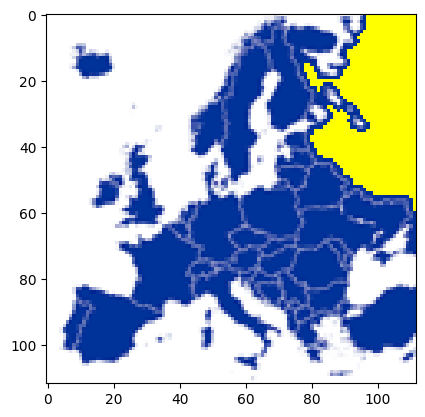

In [24]:
def flood_fill(matrix, start_x, start_y, new_color):
    
    # Dimensions de la imatge
    width = len(matrix)
    height = len(matrix[0])
    
    # Els nodes són x i y, i no necessitem una llista de visited donat que
    # si el color no es del color que volem canviar, ho ignorem
    def fill(x,y,start_color,color_to_update):
        
        # En el cas que el píxel que estem visitant sigui del color que volem canviar, doncs el canviem
        if (matrix[x][y] == start_color).all():
            matrix[x][y] = color_to_update   
            
            # Quins són els veïns d'un píxel? Podem considerar que en te 4 o que en te 8
            
            # 4 veïns
            neighbors = [(x-1,y),(x+1,y),(x,y-1),(x,y+1)]                                   
            
            # 8 veïns
            # neighbors = [(x-1,y),(x+1,y),(x-1,y-1),(x+1,y+1),(x-1,y+1),(x+1,y-1),(x,y-1),(x,y+1)] 

            # Per a cada veï del node actual, apliquem l'algorisme recursivament.
            for n in neighbors:
                
                # Cal tenir en compte estar dins les dimensions de la imatge
                if 0 <= n[0] <= width-1 and 0 <= n[1] <= height-1:
                    fill(n[0],n[1],start_color,color_to_update)

    start_color = matrix[start_x][start_y].copy()
    fill(start_x,start_y,start_color,new_color)


newdata = data.copy()             # Fem una còpia per no modificar la 'data' actual
newcolor = [255,255,0]            # Color (RGB) que usarem per pintar. Són tres valors de 0 a 255. (RGB = Red, Green, Blue)
startpoint = (0, len(newdata)-1)  # Cantonada superior dreta

flood_fill(newdata, startpoint[0], startpoint[1], newcolor)

plt.imshow(newdata)
plt.show()

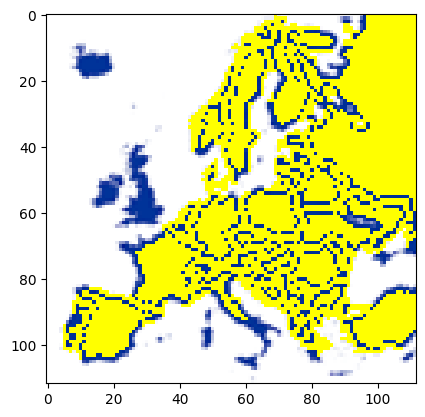

In [31]:
# SOLUCIÓ EXTRA
def flood_fill(matrix, start_x, start_y, new_color, tol=300):
    
    # Dimensions de la imatge
    width = len(matrix)
    height = len(matrix[0])
    
    # Els nodes són x i y, i no necessitem una llista de visited donat que
    # si el color no es del color que volem canviar, ho ignorem
    def fill(x,y,start_color,color_to_update):
        
        # En el cas que el píxel que estem visitant sigui del color que volem canviar, doncs el canviem
        if color_distance(matrix[x][y], start_color)<tol:
            matrix[x][y] = color_to_update   
            
            # Quins són els veïns d'un píxel? Podem considerar que en te 4 o que en te 8
            
            # 4 veïns
            neighbors = [(x-1,y),(x+1,y),(x,y-1),(x,y+1)]                                   
            
            # 8 veïns
            # neighbors = [(x-1,y),(x+1,y),(x-1,y-1),(x+1,y+1),(x-1,y+1),(x+1,y-1),(x,y-1),(x,y+1)] 

            # Per a cada veï del node actual, apliquem l'algorisme recursivament.
            for n in neighbors:
                
                # Cal tenir en compte estar dins les dimensions de la imatge
                if 0 <= n[0] <= width-1 and 0 <= n[1] <= height-1:
                    fill(n[0],n[1],start_color,color_to_update)

    start_color = matrix[start_x][start_y].copy()
    fill(start_x,start_y,start_color,new_color)


newdata = data.copy()             # Fem una còpia per no modificar la 'data' actual
newcolor = [255,255,0]            # Color (RGB) que usarem per pintar. Són tres valors de 0 a 255. (RGB = Red, Green, Blue)
startpoint = (0, len(newdata)-1)  # Cantonada superior dreta

flood_fill(newdata, startpoint[0], startpoint[1], newcolor)

plt.imshow(newdata)
plt.show()

<div class="alert alert-success">
<h1>Problema 5</h1>
<p>
    Donat un laberint com el que esteu usant a pràctiques, implementeu una funció que comprovi si té solució. La vostra funció ha de retornar True/False indicant si existeix un camí i una llista amb totes els nodes que s'han explorat.
</p>    
    
<p>

</p>
    
</div>

In [34]:
# Fem un DFS amb un cas base
def exist_path(G, source, dest, visited):
    # Cas base, si es el final, ja podem retornar True
    if source==dest:
        visited.add(source)
        return True, visited
    
    # Si no hem visitat el node actual "source"
    if source not in visited:
        visited.add(source) # Ho afegim
        for nei in G.neighbors(source): # i comprovem els nodes
            a, v = exist_path(G, nei, dest, visited)
            if a: # només retornem si ha trobat el final per aquest camí
                return a, v
    # Si cap veí té el camí al final, o aquest node ja ho hem visitat, podem tornar False
    return False, visited

Existeix camí: True


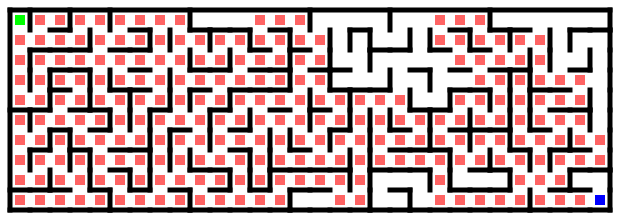

Existeix camí: False


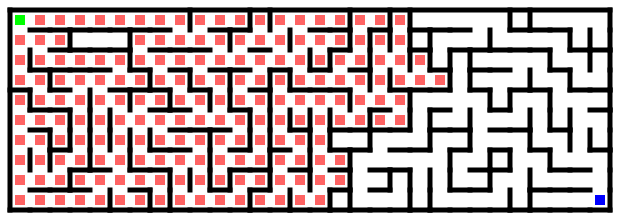

In [35]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *
from IPython.display import display_html

maze1 = Maze(30, 10, seed=17)
maze2 = Maze(30, 10, seed=15, p_build=0.25)

# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
for maze in [maze1, maze2]:
    G = maze.maze_graph()

    A = 0
    B = len(G.nodes)-1
    existeix, nodes_explorats = exist_path(G, A, B, set())
    
    print(f"Existeix camí: {existeix}")
    
    # Visualitzem
    maze.set_values(nodes_explorats, 1, color=(255,100,100))
    maze.set_value(A, 1, color=(0,255,0))
    maze.set_value(B, 1, color=(0,0,255))
    
    maze.display_maze(plot_path=True, height=200)